<a href="https://colab.research.google.com/github/Lavan1999/Dataset-15_BankMarketing_GradiantBoostingClassifier/blob/main/15_Bank_Marketing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Marketing Compaign Dataset**

# **Libraries**

In [ ]:
from pprint import pprint
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Machine Learning
import statsmodels.api as sm

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


# **DataFrame observation**


Supervised [Classification / Regression] (or) Unsupervised [Clustering / Association]

Dependent column

Independent column

Continuous column

Category column

In [ ]:
df.education_level.unique()

array(['high_school', 'unidentified', 'college', 'elementary_school'],
      dtype=object)

In [ ]:
# Dependent -
# Independent -

continuous_columns = ["call_duration", "call_frequency"]
category_columns = ["occupation",	"age",	"education_level", "marital_status", "communication_channel",
                    "call_month","call_day","previous_campaign_outcome","conversion_status"]

#supervised

# **Data cleaning using pandas**


Handling Null Values

Handling Duplicates

Data Type Conversion

Standardizing or Normalizing Data

Handling Text Data

Handling Date and Time Data

Handling Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
df.describe()

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
df.isnull().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [ ]:
def hypothesisTesting(continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [ ]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,call_day,call_duration,call_frequency
age,1.000000,-0.009120,-0.004648,0.00476
call_day,-0.009120,1.000000,-0.030206,0.16249
call_duration,-0.004648,-0.030206,1.000000,-0.08457
call_frequency,0.004760,0.162490,-0.084570,1.00000


# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,call_duration,call_frequency
Population Mean,258.16308,2.763841
Sample Means,{258.63185136031854},{2.7701614687016147}
H0_accepted,4644,4655
H0_rejected,4398,4387
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si..."


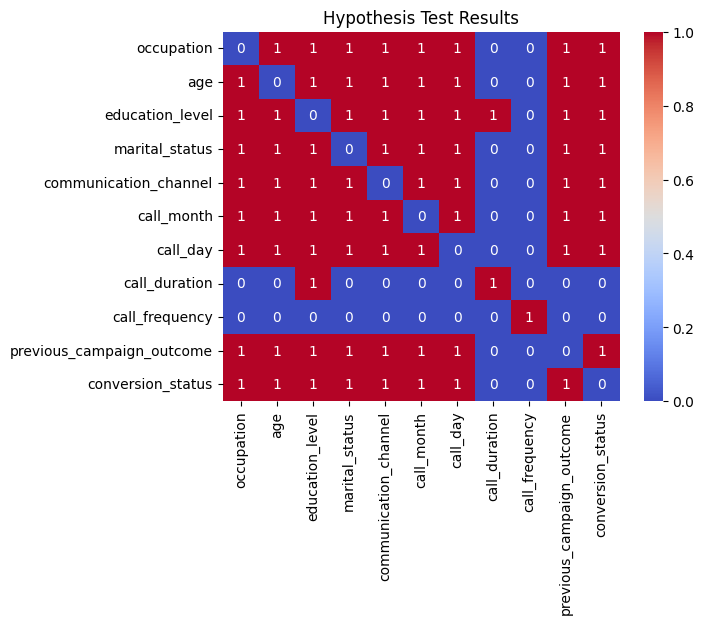

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [ ]:
sns.set()
comperativeColumn_result.fillna(3, inplace = True)
comperativeColumn_result.replace({'There is a relationship': 1, 'There is no relationship': 0}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

# **Data Visualization**

In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

<ipython-input-18-ebcbbf98ef30>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# **Preprocessing**

In [ ]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [ ]:
# Replacing categorical values with numerical
from sklearn.preprocessing import OrdinalEncoder
encode=OrdinalEncoder()
df.occupation=encode.fit_transform(df[["occupation"]])
df.education_level=encode.fit_transform(df[["education_level"]])
df.marital_status=encode.fit_transform(df[["marital_status"]])
df.communication_channel=encode.fit_transform(df[["communication_channel"]])
df.call_month=encode.fit_transform(df[["call_month"]])
df.previous_campaign_outcome=encode.fit_transform(df[["previous_campaign_outcome"]])
df.conversion_status=encode.fit_transform(df[["conversion_status"]])

# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

In [ ]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,0.0,28,2.0,1.0,2.0,11.0,9,1,1,1.0,1.0
1,0.0,58,3.0,1.0,2.0,6.0,5,307,2,2.0,1.0
2,5.0,40,2.0,0.0,1.0,3.0,4,113,1,2.0,1.0
3,7.0,63,2.0,1.0,1.0,0.0,7,72,5,2.0,1.0
4,1.0,43,0.0,1.0,0.0,5.0,29,184,4,2.0,1.0


In [ ]:
x = df.drop('conversion_status',axis =1)
y = df["conversion_status"]

In [ ]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,0.0,28,2.0,1.0,2.0,11.0,9,1,1,1.0,1.0
1,0.0,58,3.0,1.0,2.0,6.0,5,307,2,2.0,1.0
2,5.0,40,2.0,0.0,1.0,3.0,4,113,1,2.0,1.0
3,7.0,63,2.0,1.0,1.0,0.0,7,72,5,2.0,1.0
4,1.0,43,0.0,1.0,0.0,5.0,29,184,4,2.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20)

In [ ]:
x_train.shape,y_train.shape

((36168, 10), (36168,))

In [ ]:
x_test.shape, y_test.shape

((9043, 10), (9043,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.8734933097423422

In [ ]:
child =  np.array([[7,40,2,1,2,11,7,72,5,2]])
child_pred = model.predict(child)
child_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([1.])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

class Classification_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Decision Tree Classifier accuracy score: ',accuracy)
    return accuracy

  def RandomForestClassifier(self):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def Logistic(self):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def SupertVector(self):
    from sklearn import svm
    model = svm.SVC().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Support vector machines accuracy score: ',accuracy)
    return accuracy

  def KNeighborsClassifier(self):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('KNeighbors Classifier accuracy score: ',accuracy)
    return accuracy

  def GaussianNaiveBayes(self):
    from sklearn.naive_bayes import GaussianNB
    model=GaussianNB().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Naive Bayes Classifier accuracy score: ",accuracy)
    return accuracy

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy  = accuracy_score(y_test,y_pred)
    print("Gradient Boosting Classifier accuracy score: ",accuracy)
    return accuracy

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("AdaBoost Classifier accuracy score: ",accuracy)
    return accuracy

  def SGDClassifier(self):
    from sklearn.linear_model import SGDClassifier
    model = SGDClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("SGD Classifier accuracy score: ",accuracy)
    return accuracy

  def MLPClassifier(self):
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Neural network models accuracy score: ",accuracy)
    return accuracy

  def NearestCentroid(self):
    from sklearn.neighbors import NearestCentroid
    model = NearestCentroid().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Nearest Neighbors accuracy score: ",accuracy)
    return accuracy

  def LGBMClassifier(self):
    from lightgbm import LGBMClassifier
    model = LGBMClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("LGBM Classifier accuracy score: ",accuracy)
    return accuracy

In [ ]:
model = Classification_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestClassifier(),
    'SupertVector': model.SupertVector(),
    'KNeighborsClassifier' : model.KNeighborsClassifier(),
    'GaussianNaiveBayes' : model.GaussianNaiveBayes(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'SGDClassifier' : model.SGDClassifier(),
    'MLPClassifier' : model.MLPClassifier(),
    'NearestCentroid' : model.NearestCentroid(),
    #'LGBMClassifier' : model.LGBMClassifier(),
    }

max_score_classifier = max(accuracy_scores, key=accuracy_scores.get)
max_accuracy_score = accuracy_scores[max_score_classifier]

print(f"\nMaximum accuracy score: {max_accuracy_score:.4f} achieved by {max_score_classifier} classifier.\n")

Decision Tree Classifier accuracy score:  0.8706181576910318
Random Forest Classifier accuracy score:  0.906668141103616
Support vector machines accuracy score:  0.8916288842198385
KNeighbors Classifier accuracy score:  0.8831140108371116
Naive Bayes Classifier accuracy score:  0.8636514431051642
Gradient Boosting Classifier accuracy score:  0.9081057171292712
AdaBoost Classifier accuracy score:  0.9018024991706293
SGD Classifier accuracy score:  0.884662169633971
Neural network models accuracy score:  0.886431493973239
Nearest Neighbors accuracy score:  0.8158796859449298

Maximum accuracy score: 0.9081 achieved by GradientBoosting classifier.

